In [26]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.sparse import hstack
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
datapath="F:/college/bca_college/sixth sem/project/code/backend/url_dataset.csv"
df=pd.read_csv(datapath)
df.head()

,URL,Domain,Subdomain,TLD,Path,Length,NumSpecialChars,Label
0,http://www.linux.ie/mailman/listinfo/ilug,linux,www,ie,/mailman/listinfo/ilug,41,8,spam
1,http://www.geocities.com/realprotection_200220...,geocities,www,com,/realprotection_20022003/</a><br,107,22,spam
2,http://www.geocities.com/realprotection_200220...,geocities,www,com,/realprotection_20022003/</a><br,107,22,spam
3,http://www.geocities.com/ultra_weightloss_2002...,geocities,www,com,/ultra_weightloss_2002/</a><br,103,24,spam
4,http://www.geocities.com/ultra_weightloss_2002...,geocities,www,com,/ultra_weightloss_2002/</a><br,103,24,spam


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30596 entries, 0 to 30595
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   URL              30596 non-null  object
 1   Domain           30596 non-null  object
 2   Subdomain        27968 non-null  object
 3   TLD              29036 non-null  object
 4   Path             25816 non-null  object
 5   Length           30596 non-null  int64 
 6   NumSpecialChars  30596 non-null  int64 
 7   Label            30596 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.9+ MB


In [29]:
df.describe()

,Length,NumSpecialChars
count,30596.000000,30596.000000
mean,46.689894,9.286639
std,23.998406,4.994202
min,9.000000,1.000000
25%,27.000000,7.000000
50%,45.000000,9.000000
75%,60.000000,10.000000
max,637.000000,217.000000


In [30]:
print(df.duplicated().sum())
df=df.drop_duplicates()
df.duplicated().sum()

15866


np.int64(0)

In [31]:
df.isna().sum()

URL                   0
Domain                0
Subdomain          1546
TLD                 893
Path               2975
Length                0
NumSpecialChars       0
Label                 0
dtype: int64

In [32]:
df["Subdomain"] = df["Subdomain"].fillna("")
df["TLD"] = df["TLD"].fillna("")
df["Path"] = df["Path"].fillna("")

In [33]:
x=df.drop('Label',axis=1)
y=np.array([1 if lbl=="spam" else 0 for lbl in df["Label"]])

In [34]:
x_train_demo,x_test_demo,y_train_demo,y_test_demo=train_test_split(x,y,test_size=0.2,random_state=42)
x_test_sample=x_test_demo.head(7)
y_test_sample=y_test_demo[:7]
x_test_sample

,URL,Domain,Subdomain,TLD,Path,Length,NumSpecialChars
9948,http://www.news-observer.com,news-observer,www,com,,28,6
21634,http://clickthru.online.com/Click?q=7f-bn6KIIP...,online,clickthru,com,/Click?q=7f-bn6KIIPiqGbaxkO9IO3JewkhBpuR,67,9
20748,http://clickthru.online.com/Click?q=1b-wAnhI3N...,online,clickthru,com,/Click?q=1b-wAnhI3N2MVpe9PbQ1U5MauO37xrR,67,9
28405,http://www.hansv.com,hansv,www,com,,20,5
4965,http://www.rootssearch.net/auction/register.gif,rootssearch,www,net,/auction/register.gif,47,8
13191,http://clickthru.online.com/Click?q=41-qqJ1IEK...,online,clickthru,com,/Click?q=41-qqJ1IEKImbN-LLfU5CfCkxHB0FFR,67,10
4748,http://64.251.20.8/20167/index_02.jpg,64.251.20.8,,,,37,10


In [35]:
vec_URL=TfidfVectorizer()
vec_dom=TfidfVectorizer()
vec_subDom=TfidfVectorizer()
vec_TLD=TfidfVectorizer()
vec_path=TfidfVectorizer()

In [36]:
x_URL=vec_URL.fit_transform(x["URL"])
x_dom=vec_dom.fit_transform(x["Domain"])
x_subDom=vec_subDom.fit_transform(x["Subdomain"])
x_TLD=vec_TLD.fit_transform(x["TLD"])
x_path=vec_path.fit_transform(x["Path"])

In [37]:
numeric_features = x[['Length', 'NumSpecialChars']].values
scaler=StandardScaler()
x_numeric = scaler.fit_transform(numeric_features)

x = hstack([x_URL, x_dom, x_subDom, x_TLD,x_path, x_numeric])


In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((11784, 37128), (2946, 37128), (11784,), (2946,))

Logistic Regression
	Precision: 0.8909090909090909
	Recall: 0.901840490797546
	F1: 0.8963414634146342
	Accuracy: 0.9538357094365241
[[2222   72]
 [  64  588]]


Text(0.5, 1.0, 'confusion matrix')

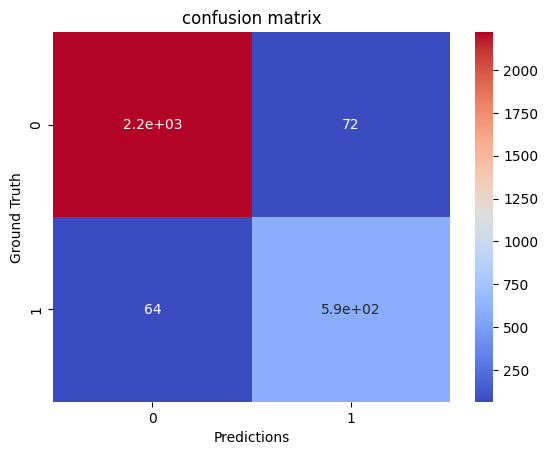

In [39]:
lr_clf=LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='liblinear',        # better for small/medium binary datasets
    max_iter=3000,
    class_weight='balanced',   # very important for spam vs ham
    random_state=42
)
lr_clf.fit(x_train,y_train)
y_pred=lr_clf.predict(x_test)
print('Logistic Regression')
print('\tPrecision:',precision_score(y_test,y_pred))
print('\tRecall:',recall_score(y_test,y_pred))
print('\tF1:',f1_score(y_test,y_pred))
print('\tAccuracy:',accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,cmap='coolwarm',annot=True)
plt.xlabel('Predictions')
plt.ylabel('Ground Truth')
plt.title('confusion matrix')

Decision Tree
	Precision: 0.8837606837606837
	Recall: 0.7929447852760736
	F1: 0.83589329021827
	Accuracy: 0.9310930074677529
[[2226   68]
 [ 135  517]]


Text(0.5, 1.0, 'confusion matrix')

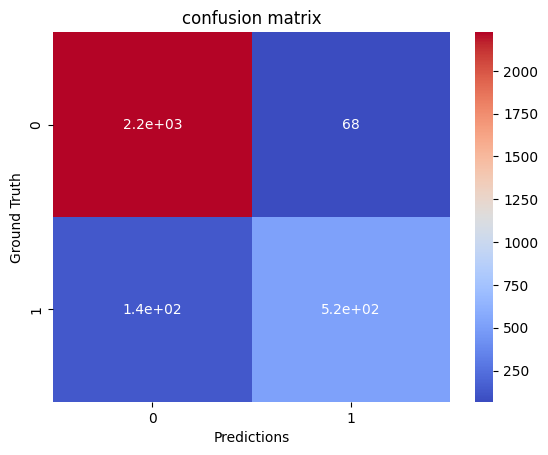

In [40]:
dt_clf=DecisionTreeClassifier(
    # criterion='gini',
    # max_depth=10,
    # min_samples_split=10,
    # min_samples_leaf=5,
    # class_weight='balanced',  # important for spam vs ham
    # random_state=42
)
dt_clf.fit(x_train,y_train)
y_pred_dt=dt_clf.predict(x_test)
print('Decision Tree')
print('\tPrecision:',precision_score(y_test,y_pred_dt))
print('\tRecall:',recall_score(y_test,y_pred_dt))
print('\tF1:',f1_score(y_test,y_pred_dt))
print('\tAccuracy:',accuracy_score(y_test,y_pred_dt))
cm=confusion_matrix(y_test,y_pred_dt)
print(cm)
sns.heatmap(cm,cmap='coolwarm',annot=True)
plt.xlabel('Predictions')
plt.ylabel('Ground Truth')
plt.title('confusion matrix')

Random Forest
	Precision: 0.9458483754512635
	Recall: 0.803680981595092
	F1: 0.8689883913764511
	Accuracy: 0.9463679565512559
[[2264   30]
 [ 128  524]]


Text(0.5, 1.0, 'confusion matrix')

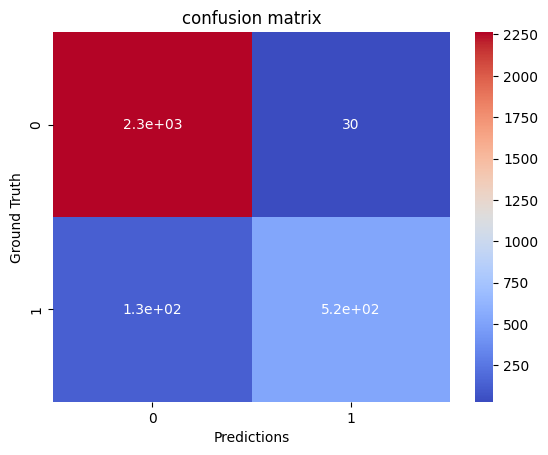

In [41]:
rf_clf=RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced',  # critical for spam detection
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)
rf_clf.fit(x_train,y_train)
y_pred_rf=rf_clf.predict(x_test)
print('Random Forest')
print('\tPrecision:',precision_score(y_test,y_pred_rf))
print('\tRecall:',recall_score(y_test,y_pred_rf))
print('\tF1:',f1_score(y_test,y_pred_rf))
print('\tAccuracy:',accuracy_score(y_test,y_pred_rf))
cm=confusion_matrix(y_test,y_pred_rf)
print(cm)
sns.heatmap(cm,cmap='coolwarm',annot=True)
plt.xlabel('Predictions')
plt.ylabel('Ground Truth')
plt.title('confusion matrix')

In [42]:
x_test_sample
y_test_sample

x_test_URL=vec_URL.transform(x_test_sample["URL"])
x_test_dom=vec_dom.transform(x_test_sample["Domain"])
x_test_subDom=vec_subDom.transform(x_test_sample["Subdomain"])
x_test_TLD=vec_TLD.transform(x_test_sample["TLD"])
x_test_path=vec_path.transform(x_test_sample["Path"])


test_numeric_features = x_test_sample[['Length', 'NumSpecialChars']].values
x_test_numeric = scaler.transform(test_numeric_features)

x_converted_sample = hstack([x_test_URL, x_test_dom, x_test_subDom, x_test_TLD,x_test_path, x_test_numeric])

y_pred_sample=lr_clf.predict(x_converted_sample)

pd.DataFrame({
    'y_test':y_test_sample,
    'y_pred':y_pred_sample
}).head(20)

,y_test,y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
5,0,0
6,1,1


In [43]:
import joblib

joblib.dump(lr_clf,'url_model.pkl')
joblib.dump(vec_subDom,'url_subDomain_vectorizer.pkl')
joblib.dump(vec_TLD,'url_TLD_vectorizer.pkl')
joblib.dump(vec_URL,'URL_vectorizer.pkl')
joblib.dump(vec_path,'url_path_vectorizer.pkl')
joblib.dump(vec_dom,'url_domain_vectorizer.pkl')
joblib.dump(scaler,'url_scaler.pkl')

['url_scaler.pkl']